Projekt: Wyznaczanie minimalnego okręgu i prostokąta zawierającego punkty

In [1]:
import numpy as np
import pandas as pd
import random
import math
from bitalg.tests.test2 import Test
from bitalg.visualizer.main import Visualizer

Generowanie losowych punktów na płaszczyźnie:

In [2]:
def generate_uniform_points(left=-100, right=100, n=100):
    points = [(random.uniform(left, right), random.uniform(left, right)) for _ in range(n)]
    return points

In [11]:
points_a = generate_uniform_points(-10, 10, 10)

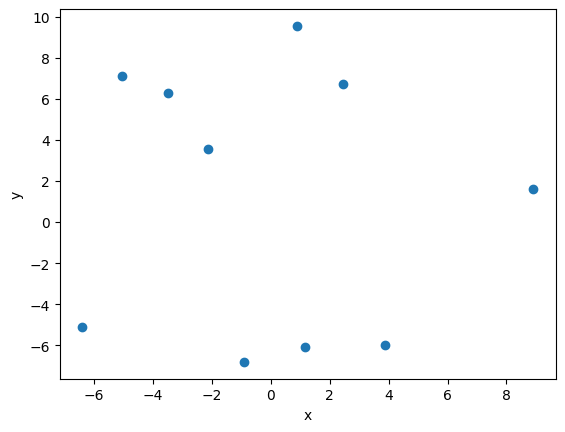

In [12]:
vis = Visualizer()
vis.add_point(points_a)
vis.show()

Generowanie losowych punktów na okręgu:

In [7]:
def generate_circle_points(O, R, n=100):
    x_center, y_center = O
    points = []

    for _ in range(n):
        angle = random.uniform(0, 2 * math.pi)

        x = x_center + R * math.cos(angle)
        y = y_center + R * math.sin(angle)

        points.append((x, y))

    return points

In [8]:
points_b = generate_circle_points((0,0), 10, 100)

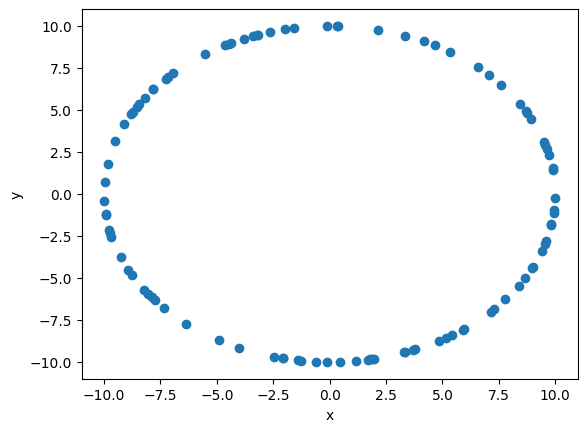

In [9]:
# visualize(points_b)
vis = Visualizer()
vis.add_point(points_b)
vis.show()

Generacja punktów na prostej:

In [21]:
def generate_collinear_points(a, b, n=100):
    x1, y1 = a
    x2, y2 = b
    c = (y1-y2)/(x1-x2)
    points = []
    for i in range(n):
        x = random.uniform(-1000, 1000)
        y = c*x + (y1 - c*x1)
        points.append((x, y))
    return points

In [22]:
points_c = generate_collinear_points((0,0), (1,2), 1000)

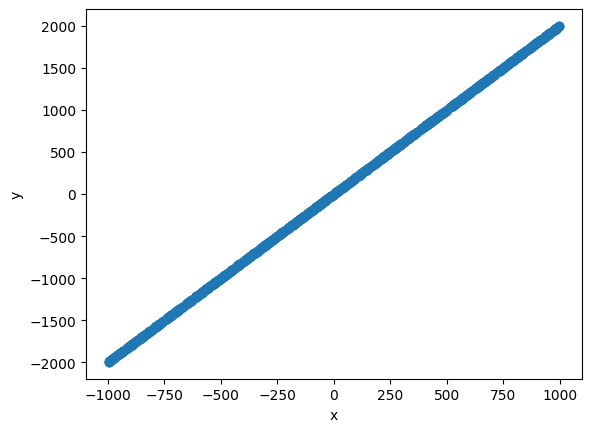

In [23]:
# visualize(points_c)
vis = Visualizer()
vis.add_point(points_c)
vis.show()

Funkcja wyznaczająca minimalny okrąg:

In [5]:
from math import sqrt
from random import randint, shuffle
import sys

sys.setrecursionlimit(10**6)

INF = 1e18

def dist(a, b):
    return sqrt(pow(a[0] - b[0], 2) + pow(a[1] - b[1], 2))

def is_inside(c, p):
    return dist(c[0], p) <= c[1]

def get_circle_center(bx, by, cx, cy):
    B = bx * bx + by * by
    C = cx * cx + cy * cy
    D = bx * cy - by * cx
    return ((cy * B - by * C) / (2 * D), (bx * C - cx * B) / (2 * D))

def circle_from1(A, B):
    C = ((A[0] + B[0]) / 2.0, (A[1] + B[1]) / 2.0)
    return (C, dist(A, B) / 2.0)

def circle_from2(A, B, C):
    I = get_circle_center(B[0] - A[0], B[1] - A[1], C[0] - A[0], C[1] - A[1])
    I = (I[0] + A[0], I[1] + A[1])
    return (I, dist(I, A))

def is_valid_circle(c, P):
    for p in P:
        if not is_inside(c, p):
            return False
    return True

def min_circle_trivial(P):
    assert len(P) <= 3
    if not P:
        return ((0, 0), 0)
    elif len(P) == 1:
        return (P[0], 0)
    elif len(P) == 2:
        return circle_from1(P[0], P[1])

    for i in range(3):
        for j in range(i + 1, 3):
            c = circle_from1(P[i], P[j])
            if is_valid_circle(c, P):
                return c

    return circle_from2(P[0], P[1], P[2])

def welzl_helper(P, R, n):
    if n == 0 or len(R) == 3:
        return min_circle_trivial(R)

    idx = randint(0, n - 1)
    p = P[idx]
    P[idx], P[n - 1] = P[n - 1], P[idx]

    d = welzl_helper(P, R.copy(), n - 1)

    if is_inside(d, p):
        return d

    R.append(p)
    return welzl_helper(P, R.copy(), n - 1)

def welzl(P):
    P_copy = P.copy()
    return welzl_helper(P_copy, [], len(P_copy))


In [170]:
from math import sqrt
from random import randint, shuffle

INF = 1e18

def dist(a, b):
    return sqrt(pow(a[0] - b[0], 2) + pow(a[1] - b[1], 2))

def is_inside(c, p):
    return dist(c[0], p) <= c[1]

def get_circle_center(bx, by, cx, cy):
    B = bx * bx + by * by
    C = cx * cx + cy * cy
    D = bx * cy - by * cx
    return ((cy * B - by * C) / (2 * D), (bx * C - cx * B) / (2 * D))

def circle_from1(A, B):
    C = ((A[0] + B[0]) / 2.0, (A[1] + B[1]) / 2.0)
    return (C, dist(A, B) / 2.0)

def circle_from2(A, B, C):
    I = get_circle_center(B[0] - A[0], B[1] - A[1], C[0] - A[0], C[1] - A[1])
    I = (I[0] + A[0], I[1] + A[1])
    return (I, dist(I, A))

def is_valid_circle(c, P):
    for p in P:
        if not is_inside(c, p):
            return False
    return True

def min_circle_trivial_draw(P, vis):
    assert len(P) <= 3
    if not P:
        a = vis.add_point((0,0), color='red')
        vis.remove_figure(a)
        return ((0, 0), 0)
    elif len(P) == 1:
        a =vis.add_point(P[0], color='red')
        vis.remove_figure(a)
        return (P[0], 0)
    elif len(P) == 2:
        c = circle_from1(P[0], P[1])
        circle = (c[0][0], c[0][1], c[1])
        a = vis.add_circle(circle, color='red')
        vis.remove_figure(a)
        return c

    for i in range(3):
        for j in range(i + 1, 3):
            c = circle_from1(P[i], P[j])
            circle = (c[0][0], c[0][1], c[1])
            circle = vis.add_circle(circle, color='red')
            vis.remove_figure(circle)
            if is_valid_circle(c, P):
                return c


    c = circle_from2(P[0], P[1], P[2])
    circle = (c[0][0], c[0][1], c[1])
    a = vis.add_circle(circle, color='red')
    vis.remove_figure(a)

    return c

def welzl_helper_draw(P, R, n, vis):
    #vis.clear()
    #vis.add_point(P)
    if n == 0 or len(R) == 3:
        return min_circle_trivial_draw(R, vis)

    idx = randint(0, n - 1)
    p = P[idx]
    point = vis.add_point(p, color='green')
    a = vis.add_point(P[n-1], color='orange')
    P[idx], P[n - 1] = P[n - 1], P[idx]
    b = vis.add_point(p, color='orange')
    c = vis.add_point(P[n-1], color='green')
    vis.remove_figure(point)
    #vis.remove_figure(a)
    #vis.remove_figure(b)
    #vis.remove_figure(c)

    d = welzl_helper_draw(P, R.copy(), n - 1, vis)

    if is_inside(d, p):
        return d

    R.append(p)
    return welzl_helper_draw(P, R.copy(), n - 1, vis)

def welzl_draw(P):
    vis = Visualizer()
    P_copy = P.copy()
    vis.add_point(P)
    return welzl_helper_draw(P_copy, [], len(P_copy), vis), vis

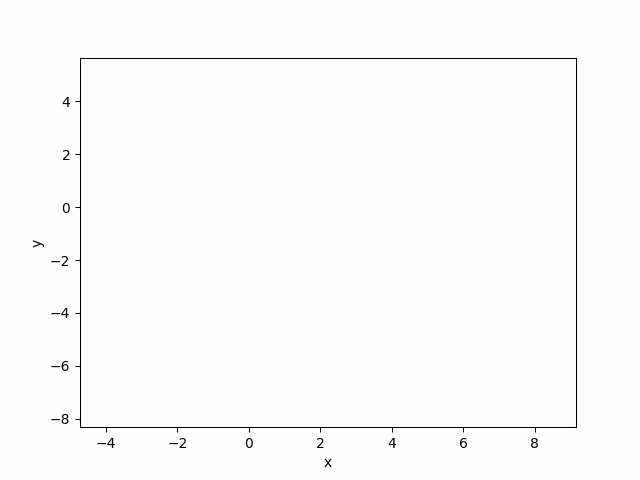

In [166]:
points20 = generate_uniform_points(-10, 10, 5)
P, vis = welzl_draw(points20)
#vis.show()
vis.show_gif(500)

In [ ]:
vis = Visualizer()
P = welzl(points_a)
print(P)
A, r = P
x, y = A
circle = (x, y, r)
circle2 = (x, y, r-r*0.01)
#vis.add_circle(circle, color='red')
#vis.add_circle(circle2, color='white')
#vis.add_point(points_a)
#vis.show()

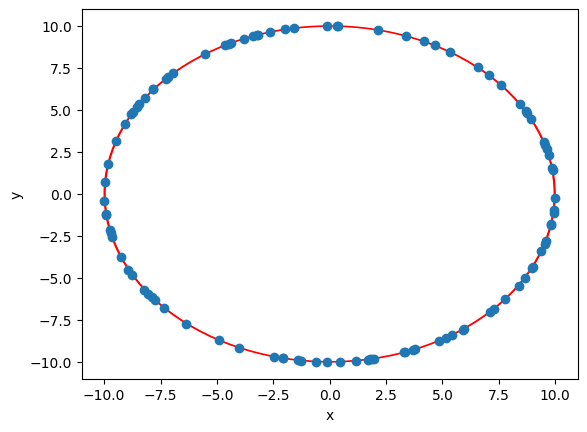

In [10]:
vis = Visualizer()
P = welzl(points_b)
A, r = P
x, y = A
circle = (x, y, r)
circle2 = (x, y, r-r*0.01)
vis.add_circle(circle, color='red')
vis.add_circle(circle2, color='white')
vis.add_point(points_b)
vis.show()

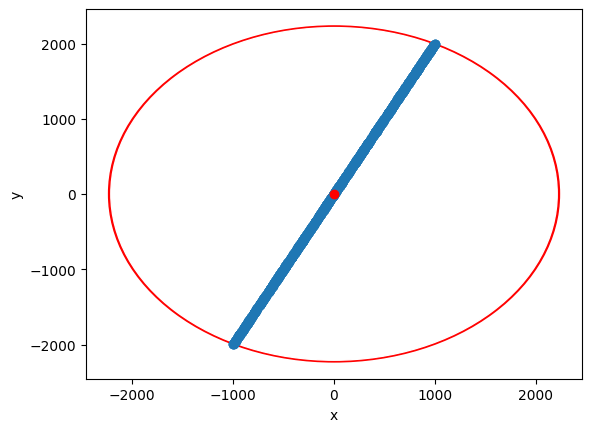

In [173]:
vis = Visualizer()
P = welzl(points_c)
A, r = P
x, y = A
circle = (x, y, r)
circle2 = (x, y, r-r*0.01)
vis.add_circle(circle, color='red')
vis.add_circle(circle2, color='white')
vis.add_point(points_c)
vis.add_point((x,y), color='red')
vis.show()

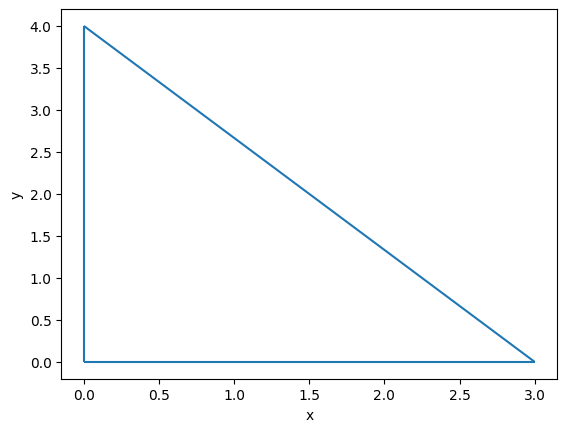

In [41]:
vis.clear()
vis.add_line_segment([((0,0), (3,0)), ((3,0), (0,4)), ((0,4), (0,0))])
vis.show()

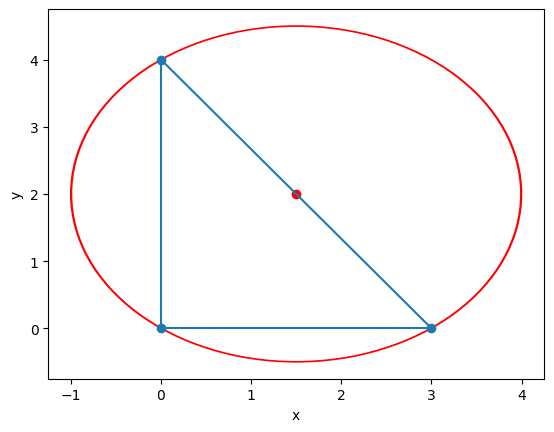

In [139]:
pointsTRI = [(0,0), (3,0), (0, 4)]
vis.clear()
vis.add_line_segment([((0,0), (3,0)), ((3,0), (0,4)), ((0,4), (0,0))])
P = welzl(pointsTRI)
A, r = P
x, y = A
circle = (x, y, r)
circle2 = (x, y, r-r*0.01)
vis.add_circle(circle, color='red')
vis.add_circle(circle2, color='white')
vis.add_point(pointsTRI)
vis.add_point((x,y), color='red')
vis.show()

Algorytm do znajdywania otoczki wypukłej:

In [6]:
def graham_algorithm(Q):
    
    def orientation(p, q, r):
        val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
        if val == 0:
            return 0 
        return 1 if val > 0 else 2 


    def lowest_point(points):
        lowest = points[0]
        for point in points[1:]:
            if point[1] < lowest[1] or (point[1] == lowest[1] and point[0] < lowest[0]):
                lowest = point
        return lowest


    def polar_angle(point):
        return math.atan2(point[1] - lowest[1], point[0] - lowest[0])

    def distance_from_lowest(point):
        return math.sqrt((point[0] - lowest[0]) ** 2 + (point[1] - lowest[1]) ** 2)

    if len(Q) < 3:
        Q.sort(key=lambda x: x[1])
        return Q


    lowest = lowest_point(Q)
    sorted_points = sorted(Q, key=lambda p: (polar_angle(p), distance_from_lowest(p)))
    hull = [sorted_points[0], sorted_points[1], sorted_points[2]]
    
    for i in range(3, len(sorted_points)):
        while len(hull) > 1 and orientation(hull[-2], hull[-1], sorted_points[i]) != 2:
            hull.pop()
        hull.append(sorted_points[i])

    return hull

Algorytm do znajdywania minimalnego (względem pola) prostokąta zawierającego punkty:

In [7]:
import math

def rotate(coords, center, angle):
    angle_rad = math.radians(angle)
    return [
        (
            center[0] + (x - center[0]) * math.cos(angle_rad) - (y - center[1]) * math.sin(angle_rad),
            center[1] + (x - center[0]) * math.sin(angle_rad) + (y - center[1]) * math.cos(angle_rad)
        )
        for x, y in coords
    ]

def scale(coords, center, factor):
    return [
        (
            center[0] + factor * (x - center[0]),
            center[1] + factor * (y - center[1])
        )
        for x, y in coords
    ]

def get_smallest_surrounding_rectangle(convex_hull, preserve_size=False):
    hull = convex_hull

    center = (
        sum(x for x, _ in hull) / len(hull),
        sum(y for _, y in hull) / len(hull)
    )

    min_area = float('inf')
    min_angle = 0.0
    ssr = None
    ci = hull[0]

    for i in range(len(hull)-1):
        cii = hull[i+1]
        angle = math.atan2(cii[1] - ci[1], cii[0] - ci[0])
        rect = rotate(hull, center, -math.degrees(angle))

        min_x = min(x for x, _ in rect)
        max_x = max(x for x, _ in rect)
        min_y = min(y for _, y in rect)
        max_y = max(y for _, y in rect)

        rect = [
            (min_x, min_y),
            (min_x, max_y),
            (max_x, max_y),
            (max_x, min_y),
            (min_x, min_y)
        ]

        rect = rotate(rect, center, math.degrees(angle))

        area = (max_x - min_x) * (max_y - min_y)

        if area < min_area:
            min_area = area
            ssr = rect
            min_angle = angle

        ci = cii

    if not preserve_size:
        return ssr

    ini = (max_x - min_x) * (max_y - min_y)
    fin = (ssr[2][0] - ssr[0][0]) * (ssr[2][1] - ssr[0][1])

    if fin == 0:
        return ssr

    return scale(ssr, center, math.sqrt(ini/fin))

# Example usage:
# convex_hull is a list of (x, y) tuples representing the vertices of the convex hull
# result = get_smallest_surrounding_rectangle(convex_hull, preserve_size=True)


In [8]:
def get_smallest_surrounding_rectangle_draw(convex_hull, points, preserve_size=False):
    vis = Visualizer()
    to_remove = []
    
    hull = convex_hull
    vis.add_point(points)
    vis.add_point(hull, color='red')
    for i in range(len(hull)-1):
        vis.add_line_segment((hull[i], hull[i+1]), color='purple')
    vis.add_line_segment((hull[0], hull[-1]), color='purple')
        
    center = (
        sum(x for x, _ in hull) / len(hull),
        sum(y for _, y in hull) / len(hull)
    )

    min_area = float('inf')
    min_angle = 0.0
    ssr = None
    ci = hull[0]

    for i in range(len(hull)-1):
        cii = hull[i+1]
        angle = math.atan2(cii[1] - ci[1], cii[0] - ci[0])
        rect = rotate(hull, center, -math.degrees(angle))

        min_x = min(x for x, _ in rect)
        max_x = max(x for x, _ in rect)
        min_y = min(y for _, y in rect)
        max_y = max(y for _, y in rect)

        rect = [
            (min_x, min_y),
            (min_x, max_y),
            (max_x, max_y),
            (max_x, min_y),
            (min_x, min_y)
        ]


        rect = rotate(rect, center, math.degrees(angle))

        area = (max_x - min_x) * (max_y - min_y)

        for i in range(len(rect)-1):
            a = vis.add_line_segment((rect[i], rect[i+1]), color='green')
            to_remove.append(a)
        
        if area < min_area:
            min_area = area
            ssr = rect
            min_angle = angle
            for i in range(len(to_remove)-4):
                vis.remove_figure(to_remove[i])
            for _ in range(len(to_remove)-4):
                to_remove.pop(0)
        else:    
            for i in range(len(to_remove)-4):
                vis.remove_figure(to_remove[i+4])
            for _ in range(len(to_remove)-4):
                to_remove.pop()

        ci = cii

    if not preserve_size:
        return ssr, vis

    ini = (max_x - min_x) * (max_y - min_y)
    fin = (ssr[2][0] - ssr[0][0]) * (ssr[2][1] - ssr[0][1])

    if fin == 0:
        return ssr, vis
    
    return scale(ssr, center, math.sqrt(ini/fin)), vis

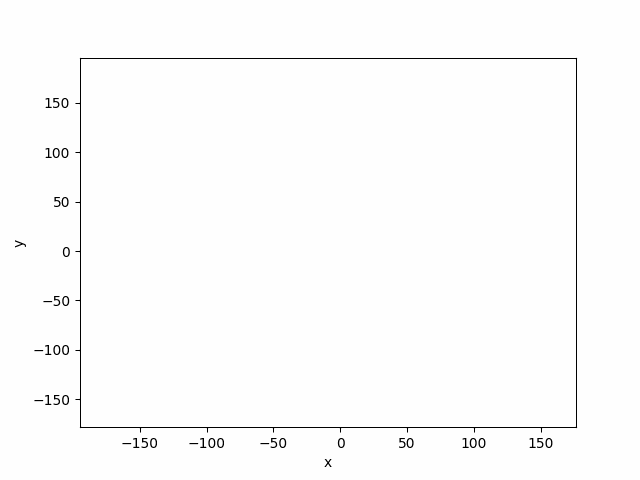

In [151]:
pointsb = [(0,0), (6,3), (4, 5), (-2, 2)]
hull = graham_algorithm(points_a)
rect, vis = get_smallest_surrounding_rectangle_draw(hull, points_a)
vis.show_gif()

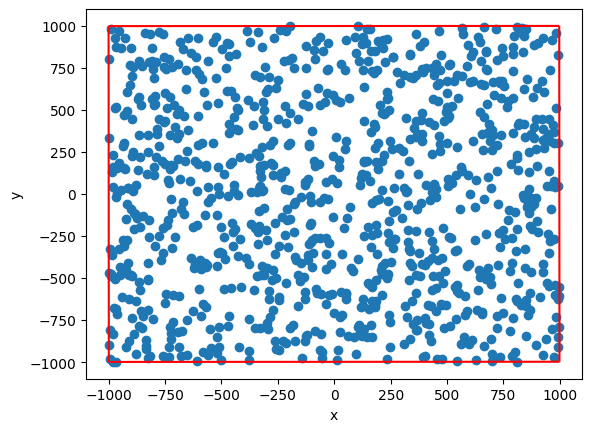

In [138]:
vis = Visualizer()
pointsb = [(0,0), (6,3), (4, 5), (-2, 2)]
points_a2 = generate_uniform_points(-1000, 1000, 1000)
hull = graham_algorithm(points_a2)
rect = get_smallest_surrounding_rectangle(hull)
for i in range(len(rect)-1):
    vis.add_line_segment((rect[i], rect[i+1]), color='red')
vis.add_point(points_a2)
vis.show()

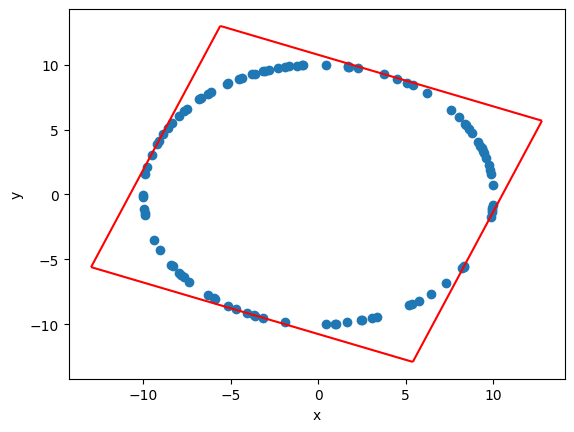

In [137]:
vis = Visualizer()
pointsb = [(0,0), (6,3), (4, 5), (-2, 2)]
hull = graham_algorithm(points_b)
rect = get_smallest_surrounding_rectangle(hull)
for i in range(len(rect)-1):
    vis.add_line_segment((rect[i], rect[i+1]), color='red')
vis.add_point(points_b)
vis.show()

[(-997.6155591031172, -1995.2311182062344), (999.482604616396, 1998.965209232792)]


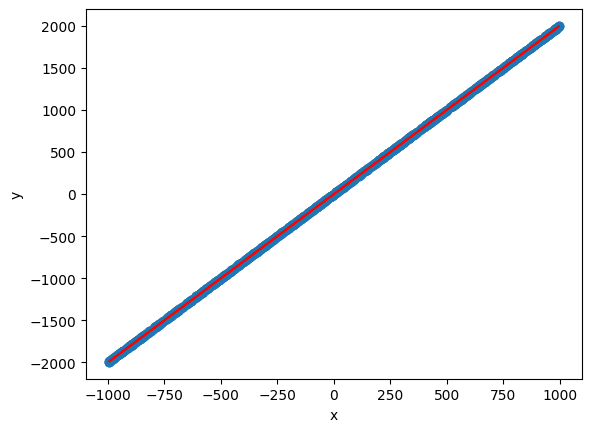

In [143]:
vis = Visualizer()
hull = graham_algorithm(points_c)
print(hull)
rect = get_smallest_surrounding_rectangle(hull)
vis.add_point(points_c)
for i in range(len(rect)-1):
    vis.add_line_segment((rect[i], rect[i+1]), color='red')
#vis.add_point(points_c)
vis.show()

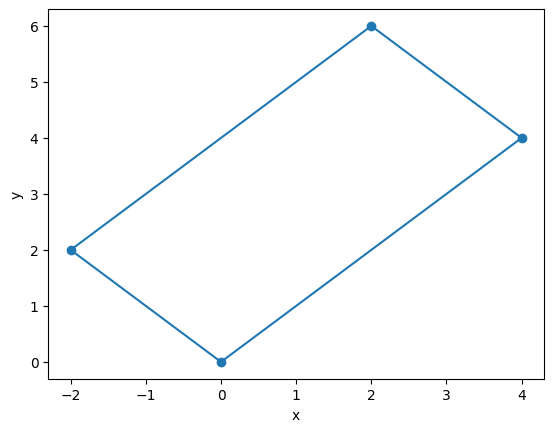

In [134]:
vis = Visualizer()
vis.add_point([(0,0), (2,6), (4, 4), (-2, 2)])
vis.add_line_segment([((0,0), (4,4)), ((4,4), (2,6)), ((2,6), (-2,2)), ((-2,2), (0,0))])
vis.show()

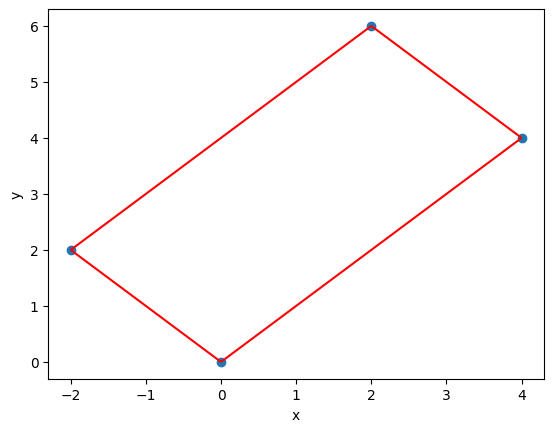

In [135]:
pointsb = [(0,0), (2,6), (4, 4), (-2, 2)]
vis = Visualizer()
hull = graham_algorithm(pointsb)
rect = get_smallest_surrounding_rectangle(hull)
for i in range(len(rect)-1):
    vis.add_line_segment((rect[i], rect[i+1]), color='red')
vis.add_point(pointsb)
vis.show()

None


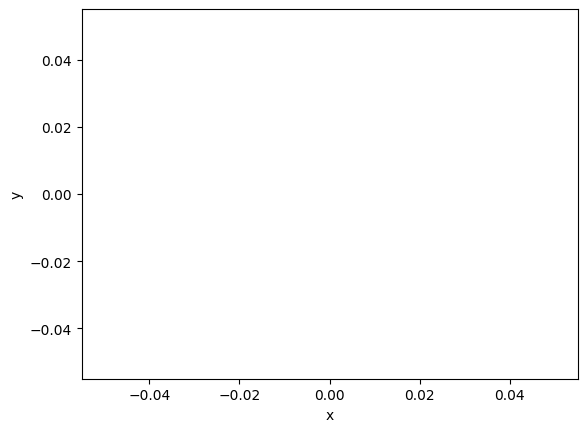

In [152]:
pointsNON = [(0,0)]
vis = Visualizer()
hull = graham_algorithm(pointsNON)
rect = get_smallest_surrounding_rectangle(hull)
print(rect)
vis.show()

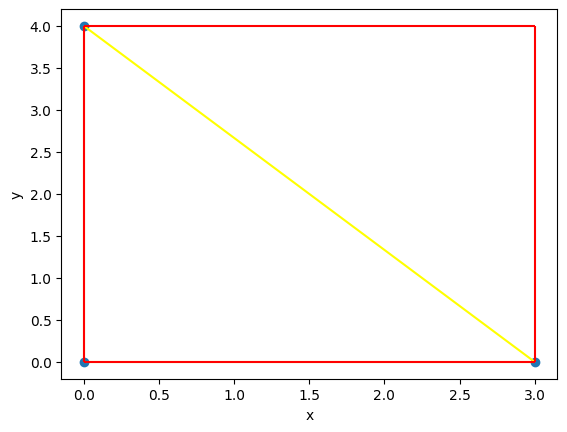

In [144]:
pointsTRI = [(0,0), (3,0), (0, 4)]
vis = Visualizer()
vis.add_line_segment([((0,0), (3,0)), ((3,0), (0,4)), ((0,4), (0,0))], color='yellow')
hull = graham_algorithm(pointsTRI)
rect = get_smallest_surrounding_rectangle(hull)
for i in range(len(rect)-1):
    vis.add_line_segment((rect[i], rect[i+1]), color='red')
vis.add_point(pointsTRI)
vis.show()

In [21]:
import math

def rotate(coords, center, angle):
    angle_rad = math.radians(angle)
    return [
        (
            center[0] + (x - center[0]) * math.cos(angle_rad) - (y - center[1]) * math.sin(angle_rad),
            center[1] + (x - center[0]) * math.sin(angle_rad) + (y - center[1]) * math.cos(angle_rad)
        )
        for x, y in coords
    ]

def scale(coords, center, factor):
    return [
        (
            center[0] + factor * (x - center[0]),
            center[1] + factor * (y - center[1])
        )
        for x, y in coords
    ]

def get_perimeter(rect):
    return sum(math.sqrt((x2 - x1)**2 + (y2 - y1)**2) for (x1, y1), (x2, y2) in zip(rect, rect[1:] + [rect[0]]))

def get_smallest_perimeter_rectangle(convex_hull, preserve_size=False):
    hull = convex_hull

    center = (
        sum(x for x, _ in hull) / len(hull),
        sum(y for _, y in hull) / len(hull)
    )

    min_perimeter = float('inf')
    min_angle = 0.0
    ssr = None
    ci = hull[0]

    for i in range(len(hull)-1):
        cii = hull[i+1]
        angle = math.atan2(cii[1] - ci[1], cii[0] - ci[0])
        rect = rotate(hull, center, -math.degrees(angle))

        min_x = min(x for x, _ in rect)
        max_x = max(x for x, _ in rect)
        min_y = min(y for _, y in rect)
        max_y = max(y for _, y in rect)

        rect = [
            (min_x, min_y),
            (min_x, max_y),
            (max_x, max_y),
            (max_x, min_y),
            (min_x, min_y)
        ]

        rect = rotate(rect, center, math.degrees(angle))

        perimeter = get_perimeter(rect)

        if perimeter < min_perimeter:
            min_perimeter = perimeter
            ssr = rect
            min_angle = angle

        ci = cii


    if not preserve_size:
        return ssr
    
    ini_perimeter = get_perimeter(hull)
    fin_perimeter = get_perimeter(ssr)

    if fin_perimeter == 0:
        print("Failed to preserve size of the smallest surrounding rectangle: Null final perimeter.")
        return ssr

    return scale(ssr, center, ini_perimeter / fin_perimeter)


In [10]:
def get_smallest_perimeter_rectangle_draw(convex_hull, points, preserve_size=False):
    vis = Visualizer()
    to_remove = []
    
    hull = convex_hull
    vis.add_point(points)
    vis.add_point(hull, color='red')
    for i in range(len(hull)-1):
        vis.add_line_segment((hull[i], hull[i+1]), color='purple')
    vis.add_line_segment((hull[0], hull[-1]), color='purple')
    
    center = (
        sum(x for x, _ in hull) / len(hull),
        sum(y for _, y in hull) / len(hull)
    )

    min_perimeter = float('inf')
    min_angle = 0.0
    ssr = None
    ci = hull[0]

    for i in range(len(hull)-1):
        cii = hull[i+1]
        angle = math.atan2(cii[1] - ci[1], cii[0] - ci[0])
        rect = rotate(hull, center, -math.degrees(angle))

        min_x = min(x for x, _ in rect)
        max_x = max(x for x, _ in rect)
        min_y = min(y for _, y in rect)
        max_y = max(y for _, y in rect)

        rect = [
            (min_x, min_y),
            (min_x, max_y),
            (max_x, max_y),
            (max_x, min_y),
            (min_x, min_y)
        ]

        rect = rotate(rect, center, math.degrees(angle))

        perimeter = get_perimeter(rect)

        for i in range(len(rect)-1):
            a = vis.add_line_segment((rect[i], rect[i+1]), color='green')
            to_remove.append(a)

        if perimeter < min_perimeter:
            min_perimeter = perimeter
            ssr = rect
            min_angle = angle
            for i in range(len(to_remove)-4):
                vis.remove_figure(to_remove[i])
            for _ in range(len(to_remove)-4):
                to_remove.pop(0)
        else:    
            for i in range(len(to_remove)-4):
                vis.remove_figure(to_remove[i+4])
            for _ in range(len(to_remove)-4):
                to_remove.pop()

        ci = cii


    ini_perimeter = get_perimeter(hull)
    fin_perimeter = get_perimeter(ssr)

    if fin_perimeter == 0:
        print("Failed to preserve size of the smallest surrounding rectangle: Null final perimeter.")
        return ssr, vis

    return scale(ssr, center, ini_perimeter / fin_perimeter), vis


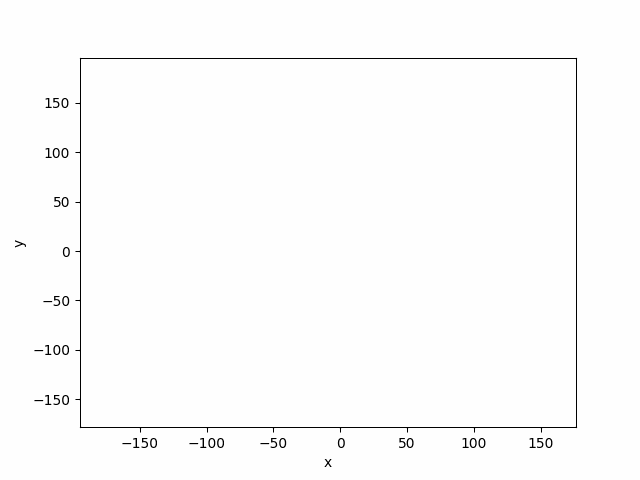

In [148]:
hull = graham_algorithm(points_a)
rect, vis = get_smallest_perimeter_rectangle_draw(hull, points_a)
vis.show_gif()

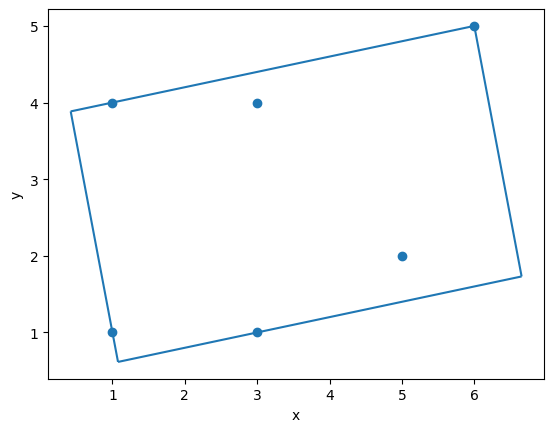

In [114]:
vis = Visualizer()
pointsb = [(0,0), (1,0), (2, 7), (1, 8)]
points = [(1, 1), (1, 4), (3, 1), (3, 4), (5, 2), (6, 5)]
hull = graham_algorithm(points)
rect = get_smallest_surrounding_rectangle(hull)
for i in range(len(rect)-1):
    vis.add_line_segment((rect[i], rect[i+1]))
    
vis.add_point(points)
vis.show()

In [38]:
Field = []
Per = []
points = []
while Field == Per:
    points = generate_uniform_points(-10, 10, 5)
    hull = graham_algorithm(points)
    Field = get_smallest_surrounding_rectangle(hull)
    Per = get_smallest_perimeter_rectangle(hull)

print("Pole:")
print(Field)
print("Obwód:")
print(Per)
print("Punkty:")
print(points)

Pole:
[(-1.9453586994351557, 6.374326736329144), (2.440679531591806, 7.839783303358601), (7.506495462250368, -7.321950481937037), (3.1204572312234062, -8.787407048966493), (-1.9453586994351557, 6.374326736329144)]
Obwód:
[(4.20700299944664, -8.424371993741277), (-0.8709932888270449, -8.78427482161516), (-1.9453586994351555, 6.374326736329144), (3.1326375888385294, 6.734229564203028), (4.20700299944664, -8.424371993741277)]
Punkty:
[(2.0841556556662706, -5.685808249296502), (-1.9453586994351557, 6.374326736329145), (3.2194860117235855, 5.508854449319857), (4.207002999446637, -8.424371993741275), (3.4772631685127493, -6.483734723203636)]


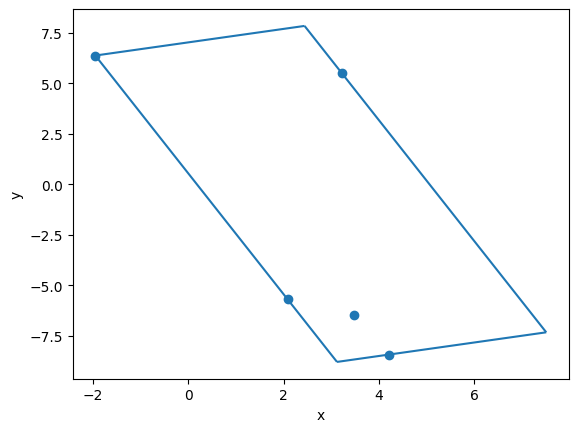

In [39]:
vis = Visualizer()
vis.add_point(points)
for i in range(len(Field)-1):
    vis.add_line_segment((Field[i], Field[i+1]))
vis.show()

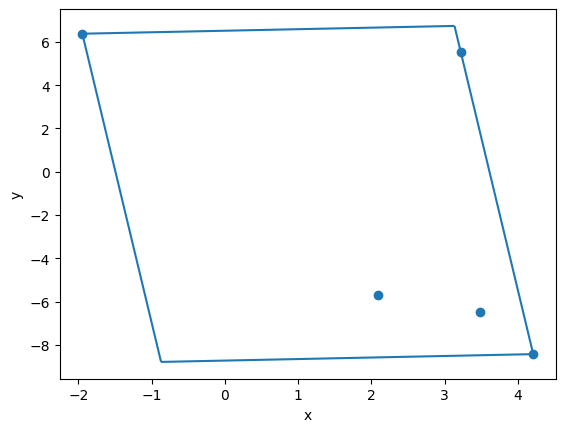

In [40]:
vis2 = Visualizer()
vis2.add_point(points)
for i in range(len(Per)-1):
    vis2.add_line_segment((Per[i], Per[i+1]))
vis2.show()